# <center>**ML School by REU Data Scinece Club**</center>

---
## <center> Неделя №3 </center>




На этой неделе вам предстоит обработать данные о зарплатах. Данные очень похожи на настоящие, поэтому вам будет в каких-то моментах неприятно) В них очень много мусора и поэтому понадобиться потратить время на обработку. DS - специалист работает с чем-то подобным крайне часто.
Если столкнетесь с проблемой, пишите в чат, где вам помогут авторы и остальные участники, решать проблемы в коллективе - легче. Удачи!

Про данные можно прочитать [тут](https://oscarbaruffa.com/messy/)

Импортируем библиотеки которые могут вам понадобиться, а затем загрузим данные

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Теперь давайте скачаем нужные данные


In [ ]:
!git clone https://github.com/MeinRespect/REU-Ml-SCHOOL.git

fatal: destination path 'REU-Ml-SCHOOL' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/REU-Ml-SCHOOL/right_data.csv')
df.sample(5)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
17944,4/28/2021 21:53:33,45-54,Transport or Logistics,Enterprise Architect,NaN,"170,000",40000.0,CAD,NaN,NaN,Canada,NaN,Calgary,21 - 30 years,11 - 20 years,College degree,Man,White
14054,4/28/2021 13:58:32,35-44,Nonprofits,Senior Project Manager,This is a director level position,"156,000",0.0,USD,NaN,NaN,USA,New York,New York,11 - 20 years,5-7 years,Master's degree,Woman,Another option not listed here or prefer not t...
15254,4/28/2021 16:48:51,35-44,Media & Digital,VP of Content & Marketing,NaN,"80,000",500.0,USD,NaN,NaN,US,Tennessee,Nashville,11 - 20 years,11 - 20 years,College degree,Woman,White
10272,4/27/2021 20:22:05,35-44,Property or Construction,Sr. Project Administrator,NaN,"64,500",0.0,USD,NaN,NaN,United States,Pennsylvania,Media,21 - 30 years,11 - 20 years,College degree,Woman,White
24677,5/5/2021 17:43:48,35-44,Recruitment or HR,VP HR,NaN,180000,100000.0,USD,NaN,NaN,USA,Illinois,Chicago,11 - 20 years,8 - 10 years,College degree,Woman,White


Как можно заметить названия колонок оставляют желать лучшего, давайте это исправим

In [ ]:
df.columns = ['Timestamp', 'Age','Industry', 'Job', 'Job context', 'Salary',
              'Amount of monetary compensation', 'Currency',
              'Currency special', 'Income context', 'Country',
              'State in USA', 'City', 'Work expirince all',
              'Work expirince in current field', 'Education', 'Gender', 'Race'
              ]


# **Задание 1. Чистка данных (6 баллов)**

## Этап 1.1
Теперь вам нужно привести колонки Salary и Amount of monetary compensation к единой шкале измерения - доллару.
Для этого вы можете использовать два способа:

1.   Простой. Вы берете сегодняшнюю дату и приводите все основные валюты из колонки Currency к доллару, а те строчки, где значение колонки равно "Other", вы удаляете.
2.   Сложный. Вы смотрите на значение Timestamp и актуальный для этой даты курс. Если в Currency встречается значение "Other", то вы пытаетесь восстановить валюту по колонке Currency Special. Тут вам может пригодится библиотека [forex](https://forex-python.readthedocs.io/en/latest/usage.html). Внимание! Библиотека часто не работает и выдает различные ошибки. Вы можете попробовать найти альтернативу или придмать свой интересный способ.

За оба решения вы получите **одинаковое количество баллов**, но учитывайте, что в простом вы теряете много полезной информации.

In [ ]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Salary']=df['Salary'].astype(str).str.replace(',','',regex=True)
df['Salary']=pd.to_numeric(df['Salary'])
df['Salary']=df.apply(lambda row: row['Salary']/0.76994 if row['Currency']=='GBP' else row['Salary'],axis=1)
df['Salary']=df.apply(lambda row: row['Salary']/1.39 if row['Currency']=='CAD' else row['Salary'],axis=1)
df['Salary']=df.apply(lambda row: row['Salary']/1.52 if row['Currency']=='AUD' else row['Salary'],axis=1)
df['Salary']=df.apply(lambda row: row['Salary']/0.86 if row['Currency']=='CHF' else row['Salary'],axis=1)
df['Salary']=df.apply(lambda row: row['Salary']/0.91 if row['Currency']=='EUR' else row['Salary'],axis=1)
df['Salary']=df.apply(lambda row: row['Salary']/7.77 if row['Currency']=='HKD' else row['Salary'],axis=1)
df['Salary']=df.apply(lambda row: row['Salary']/152.74 if row['Currency']=='JPY' else row['Salary'],axis=1)
df['Salary']=df.apply(lambda row: row['Salary']/10.69 if row['Currency']=='SEK' else row['Salary'],axis=1)
df['Salary']=df.apply(lambda row: row['Salary']/17.56 if row['Currency']=='ZAR' else row['Salary'],axis=1)
df.drop(df[df['Currency']=='Other'].index,inplace=True)
df = df.drop(['Currency'], axis=1)
df = df.drop_duplicates()


После стандартизации к доллару удалите эти две колонки: Currency и Currency Special


In [ ]:
df.drop(columns=['Currency special'],errors='ignore',inplace=True)
df['Country']=df['Country'].astype(str)
df

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.0,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,70914.616723,4000.0,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.0,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.0,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27940,2023-02-23 15:45:08,25-34,"Accounting, Banking & Finance",Associate Business Development,NaN,44946.043165,10000.0,NaN,Canada,NaN,Toronto,8 - 10 years,2 - 4 years,College degree,Woman,White
27941,2023-02-27 06:22:35,25-34,Computing or Tech,Sr software engineer,NaN,190000.000000,14000.0,NaN,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37,45-54,Property or Construction,Property Manager,Senior,55000.000000,13000.0,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,2023-03-06 18:16:19,25-34,Behavioral Health,Mental Health Therapist,NaN,52416.000000,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White


## Этап 1.2
Приведите страны к единым названиям, например в данных не должно быть одновременно USA и United States. Различных значений много, но постарайтесь сохранить как можно больше информации. Строки с нерелевантными значениями удалите. В качестве помощи мы уже подготовили значения для замены некоторых стран. Обрабатывать все наблюдения необязательно, но постарайтесь восстановить как можно больше значений.                                   

In [ ]:
usa_names = ['United States', 'US', 'USA',
       'usa', 'U.S.', 'United States ', 'us',
       'Usa', 'United States of America', 'United states', 'USA ',
       'United states ','united states', 'United States of America ',
       'U.S. ', 'U.S>', 'ISA', 'US ', 'United State', 'U.S.A',
       'U.S.A.', 'America', 'united states of america', 'Us', 'The United States',
       'United State of America', 'United Stated','u.s.', 'UNITED STATES', 'united States',
       'USA-- Virgin Islands', 'U.S', 'Unites States ', 'Usa ', 'U.S.A. ',
       'U. S. ', 'United Sates', 'United States of American ''Uniited States',
       'Worldwide (based in US but short term trips aroudn the world)',
       'United Sates of America', 'United States', 'america', 'Unted States', 'United Statesp',
       'United Stattes', 'United Statea', 'Unites States', 'United Statees',
       'UNited States', 'Uniyed states', 'Uniyes States', 'United States of Americas',
       'U.A.', 'U. S.' 'US of A', 'United States of america ',
       'U.SA', 'United Status', ' U.S.', 'Serbia', 'Canada and USA',
       'Virginia', 'U.s.', 'U.s.a.', 'USS', 'Uniteed States', 'United Stares',
       ' US', 'Unites states ', 'Us ', 'Unite States', 'The US',
       'united states ', 'United States (I work from home and my clients are all over the US/Canada/PR',
       'United states of America ', 'For the United States government, but posted overseas',
       'From Romania, but for an US based company', 'UnitedStates', 'Uniited States',
       'United States of america', 'United statew', ' United States', 'United Statues',
       'Untied States', 'United States of American ', 'USA (company is based in a US territory, I work remote)',
       'USAB', 'Unitied States', 'United Sttes', 'united stated', 'United States Of America',
       'Uniter Statez', 'U. S ', 'United states of America',
       'USA tomorrow ', 'United Stateds', 'Japan, US Gov position',
       'n/a (remote from wherever I want)',  'US govt employee overseas, country withheld', 'usa ',
       'San Francisco', 'Usat', '🇺🇸 ', 'Unitef Stated', 'UA',
       'United Stares ', 'United STates', 'USaa', 'uSA',
       'United States- Puerto Rico','California ', 'US of A',
       'uS', 'USD', "USA, but for foreign gov't", 'U. S.', 'United y',
       'United Statss', 'United states of america', 'UsA',
       'I work for a UAE-based organization, though I am personally in the US.',
       'United  States',  'United States is America',
       'United States of American', 'U.S.A ', 'United Statws']

uk_names = ['United Kingdom', 'United Kingdom ', 'Scotland ',
           'United Kingdom', 'UK ', 'England/UK',
           'UK', 'Great Britain ', 'Englang',
           'Scotland', 'UK (England)',
           'England', 'UK', 'Wales (United Kingdom)', 'England ',
           'Ireland', 'United kingdom ', 'Uk', 'united kingdom',
           'Great Britain', 'UK for U.S. company',
           'England', 'U.K. (northern England)', 'U.K',
           'Ireland', 'Wales (UK)', 'ireland'
           'Northern Ireland',  'europe', 'United Kingdom (England)',
           'United Kingdom.', 'Northern Ireland ', 'england',
           'United kingdom', 'United Kingdomk', 'UK (Northern Ireland)',
           'England, Gb', 'UK, remote', 'ENGLAND', 'England, UK.',
           'England, United Kingdom', 'U.K.', 'Scotland, UK', 'Wales', 'United Kindom',
           'Wales, UK', 'Unites kingdom',  'U.K. ',
           'Wales, UK', 'England, UK',  'Uk ',  'uk',
           'Northern Ireland, United Kingdom', 'uk',
           'UK, but for globally fully remote company']

canada_names = ['canada', 'Canada ', 'Canada, Ottawa, ontario', 'CANADA ',
               'Canadw', 'CANADA', 'Can', 'Canda', 'Canad', 'Csnada', 'Canadá', 'Canada ', 'Canad', 'Csnada']

ger_names = ['Germany ', 'germany', 'Company in Germany. I work from Pakistan.']

In [ ]:
usa_map={name:'USA' for name in usa_names}
uk_map={name:'UK' for name in uk_names}
canada_map={name:'CAN' for name in canada_names}
ger_map={name:'GER' for name in ger_names}
country_mapping = {**usa_map, **uk_map, **canada_map, **ger_map}
df['Country'] = df['Country'].replace(country_mapping)
df[df['Country'].isin(['USA','Canada','UK','GER'])]


,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.0,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,70914.616723,4000.0,NaN,UK,NaN,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,NaN,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.0,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.0,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27940,2023-02-23 15:45:08,25-34,"Accounting, Banking & Finance",Associate Business Development,NaN,44946.043165,10000.0,NaN,Canada,NaN,Toronto,8 - 10 years,2 - 4 years,College degree,Woman,White
27941,2023-02-27 06:22:35,25-34,Computing or Tech,Sr software engineer,NaN,190000.000000,14000.0,NaN,USA,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37,45-54,Property or Construction,Property Manager,Senior,55000.000000,13000.0,NaN,USA,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,2023-03-06 18:16:19,25-34,Behavioral Health,Mental Health Therapist,NaN,52416.000000,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White


# **Задание 2. Замена пропущенных значений (5 баллов)**



## Этап 2.1
Найдите в данных пропущенные значения и выведите их количество для каждой колонки:

In [ ]:
df.isna().sum()

,0
Timestamp,0
Age,0
Industry,71
Job,0
Job context,20601
Salary,0
Amount of monetary compensation,7206
Income context,24779
Country,0
State in USA,4839


Замените пропущенные значения во всех колонках **кроме Education**. Там где можно сделайте это с помощью моды, а в колонках по типу State in USA замените на определенное значение, в данном случае Another Country, а в Amount of monetary compensation на 0

In [ ]:
df['State in USA'].fillna('Another Country')
df['Industry'].astype(str).fillna('NaN')
df['Job context'].astype(str).fillna('NaN')
df['Income context'].astype(str).fillna('NaN')
df['City'].astype(str).fillna('NaN')
df['Industry'].astype(str).fillna('NaN')
df['Amount of monetary compensation']=pd.to_numeric(df['Amount of monetary compensation'])
df['Amount of monetary compensation']=df['Amount of monetary compensation'].apply(lambda x: 0 if pd.isna(x) else x)
mode_value=df['Gender'].mode()[0]
mode_value2=df['Race'].mode()[0]
mode_val3=df['Industry'].mode()[0]
df['Gender']=df['Gender'].fillna(mode_value)
df['Race']=df['Race'].fillna(mode_value2)
df['Industry']=df['Industry'].fillna(mode_val3)
#Race and gender

## Этап 2.2
Давайте теперь попоробуем заменить пропущенные значения при помощи Sklearn. В этой библиотеке есть много классных методов для замены пропусков и они позволяют это делать более точнее. В данном случае мы возьмем самый простой - [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

Что нужно сделать:

1.   Импортируйте библиотеку
2.   Замените пропуски в колонке Education с помощью SimpleImputer(пример есть в документации, также лучше использовать параметр strategy=most_frequent).
3.   Преобразуйте результат из numpy.array в датафрейм и поменяйте название колонок
4.   Замените старый датасет на новый


In [ ]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# Преобразование колонки в массив NumPy и изменение размерности
education_values = imp_mean.fit_transform(df[['Education']])
df['Education']=education_values.flatten()
# Обучение импатера и заполнение пропусков


# **Задание 3. Построение графиков (5 баллов)**


Давайте начинать исследование наших данных с помошью графиков. Для начала оцените по графику violin plot как распределна зарплата и есть ли в ней выбросы. Если у вас не получается построить нормальный график, то вам нужно удалить аномально большие значения.

---

**Важно! Графики должны быть читаемыми**

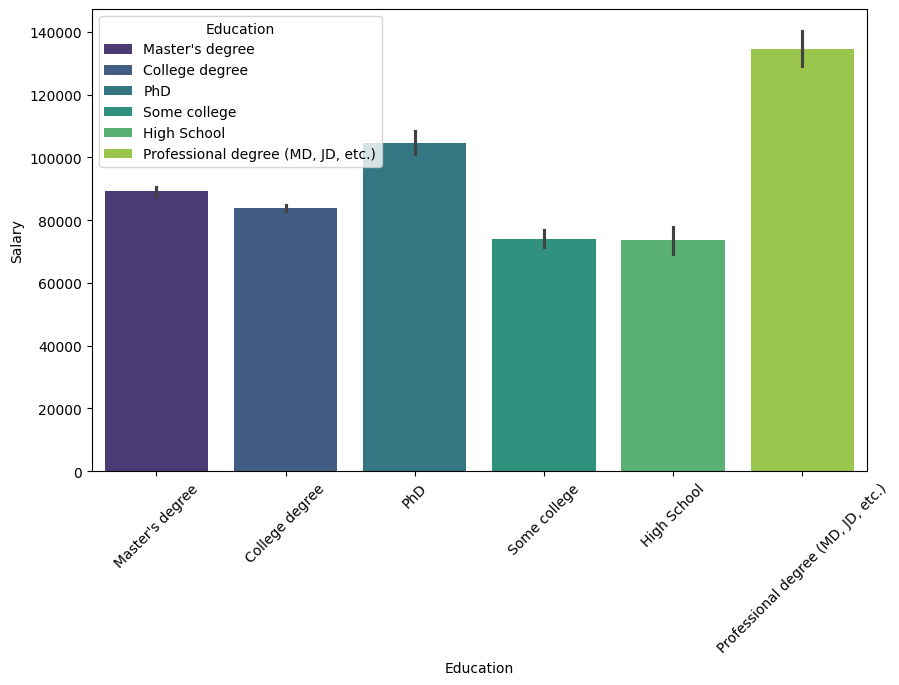

In [ ]:
df=df[df['Salary']<4e6]
plt.figure(figsize=(10,6))
sns.barplot(x='Education',y='Salary',data=df,hue='Education',palette='viridis',legend=True)
plt.xticks(rotation=45)
plt.show()

Теперь давайте ответим на несколько вопросов о наших данных с помощью графиков

**1)** У каких десяти индустрий самые высокие средние зарплаты? (Для этого лучше всего подойдет barplot)

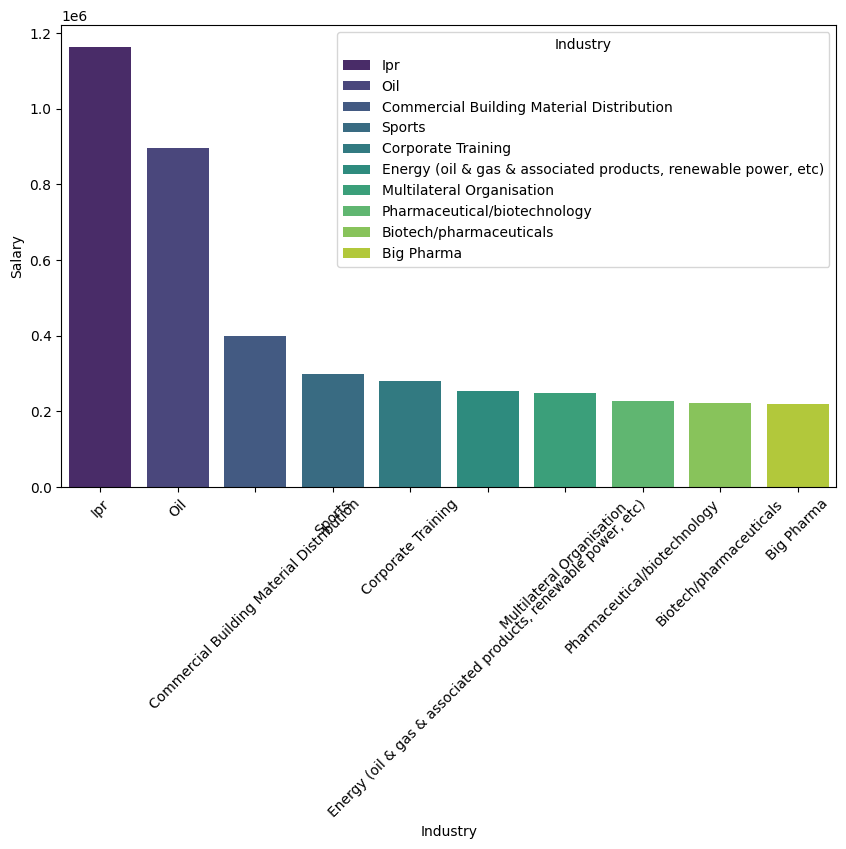

In [ ]:
plt.figure(figsize=(10,6))
top_10=df.groupby('Industry')['Salary'].mean()
#top_10
top_10=top_10.sort_values(ascending=False).head(10).reset_index()
#top_10
sns.barplot(x='Industry',y='Salary',data=top_10,hue='Industry',palette='viridis',legend=True)
plt.xticks(rotation=45)
plt.show()

**2)** Влияет ли опыт работы на среднюю зарплату? (Для этого лучше всего подойдет barplot)

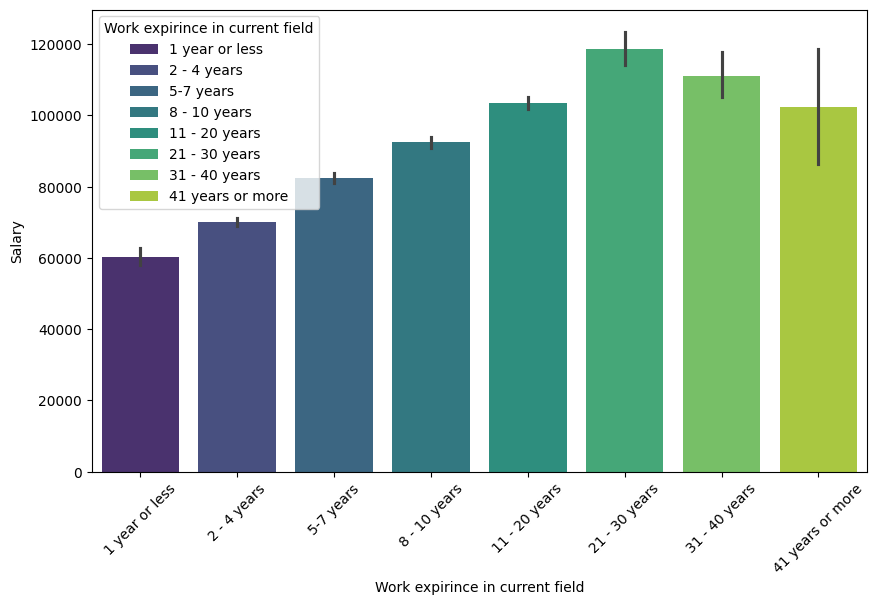

In [ ]:
plt.figure(figsize=(10,6))
#top=df.groupby('Work expirince in current field')['Salary']
#top.info()
sorted_order = [
    '1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years',
    '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more'
]
df.loc[:,'Work expirince in current field']=pd.Categorical(df['Work expirince in current field'],categories=sorted_order,ordered=True)
data2=df.sort_values(by='Work expirince in current field',ascending=True)
data2['Work expirince in current field'].unique()
sns.barplot(x='Work expirince in current field',y='Salary',data=data2,hue='Work expirince in current field',palette='viridis',legend=True)
plt.xticks(rotation=45)
plt.show()

**3)** Выделяется ли в зарплате и премиях зависимость от образования? (Тут нужно построить scatter plot, при этом выбрать значения Amount of monetary compensation неравные 0)

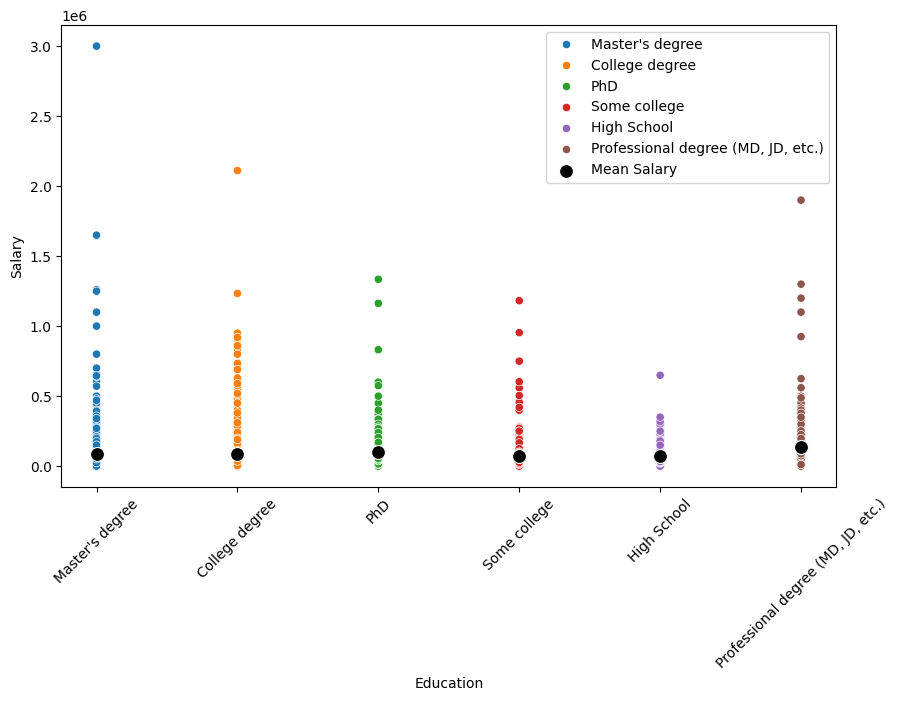

In [ ]:
df[df['Amount of monetary compensation']!=0]
plt.figure(figsize=(10,6))
sns.scatterplot(x='Education',y='Salary',data=df,hue='Education',palette='tab10')
df_2=df.groupby('Education')['Salary'].mean().reset_index()
sns.scatterplot(x='Education',y='Salary',data=df_2,color='black',marker='o', s=100, label='Mean Salary', edgecolor='w')
plt.xticks(rotation=45)
plt.show()

# **Задание 4. Создание новых признаков (4 балла)**

Давайте теперь создадим **2 новых признака**. Мы предлагаем вам три идеи, но вы вправе придумать что то свое. Главное условие, признаки не должны повторять предыдущие и быть линейно зависимыми. например нельзя просто умножить колонку Salary на два и добавить ее к датафрейму.

Идеи которые предлагаем мы:

1.   Преобразовать колонку Race и сделать ее полезной для будующей модели. Это не совсем создание нового признака, скорее преобразование старого. Все расы в ней разделены союзом or или запятой. Вы можете создать аналог дамми переменных и разделить расы на колонки. если человек указал данную расу - ставить 1.
2.   Создать новую колонку с населением города, в котором живет человек. Для этого вы можете взять данные по пути - /content/REU-Ml-SCHOOL/city_population_data.csv.
3. Добавить колонку со cредней зарплатой человека, основанной на его возрасте и опыте работы.


In [ ]:
df2=pd.read_csv('/content/REU-Ml-SCHOOL/city_population_data.csv')
#df.merge(df2[['city','population']],how='left',left_on='City',right_on='city',suffixes=('', '_from_df2'))
df=df.rename(columns={'population':'City population '}).drop(columns=['city_x','city_y','population_x', 'population_y','city'],errors='ignore')
df


,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race,Population
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.0,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,4688346.0
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,70914.616723,4000.0,NaN,UK,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Woman,White,129920.0
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.0,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,415501.0
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.0,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,1365787.0
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.0,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,484465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27782,2023-02-23 15:45:08,25-34,"Accounting, Banking & Finance",Associate Business Development,NaN,44946.043165,10000.0,NaN,Canada,NaN,Toronto,8 - 10 years,2 - 4 years,College degree,Woman,White,5429524.0
27783,2023-02-27 06:22:35,25-34,Computing or Tech,Sr software engineer,NaN,190000.000000,14000.0,NaN,USA,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American,5743938.0
27784,2023-03-01 09:43:37,45-54,Property or Construction,Property Manager,Senior,55000.000000,13000.0,NaN,USA,Ohio,Brunswick,21 - 30 years,11 - 20 years,College degree,Woman,White,53914.0
27785,2023-03-06 18:16:19,25-34,Behavioral Health,Mental Health Therapist,NaN,52416.000000,0.0,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White,NaN


На этом все, если вы качественно подготовили данные, то у вас на руках датасет, который можно использоват например для обучения модели по предсказанию зарплаты или для научной работы